[FASE 0.0] Memuat dan Melakukan Overview Dataset Awal...

[INFO] Berhasil memuat file untuk overview: Data Pakai Label.csv

--- Informasi Dasar Dataset ---
Jumlah Baris (Sampel): 10798
Jumlah Kolom (Fitur): 9

Nama Kolom:
['userName', 'content', 'score', 'reviewCreatedVersion', 'at', 'Sentimen (Aurel)', 'Sentimen (Ade)', 'Sentimen (Eky)', 'Sentimen Akhir']

Beberapa Baris Pertama Data:
          userName                                            content  score  \
0    Made Darmawan  Saya kasi bintang 1 dulu ya. Tolong diperbaiki...      1   
1    windi tripani  Apknya memudahkan dalam perubahan data, ngecek...      5   
2       PURLAMBANG  Saya mau merubah data KIS saya di aplikasi jkn...      1   
3        Nanang WR  Faskes tidak bisa di search, dan yang ditampil...      1   
4  Oktriyani Putri  Kenapa ketika ingin masuk akun ada pendaftaran...      1   

  reviewCreatedVersion                   at  Sentimen (Aurel)  Sentimen (Ade)  \
0                4.3.0  2023-01-22 12:04:08      

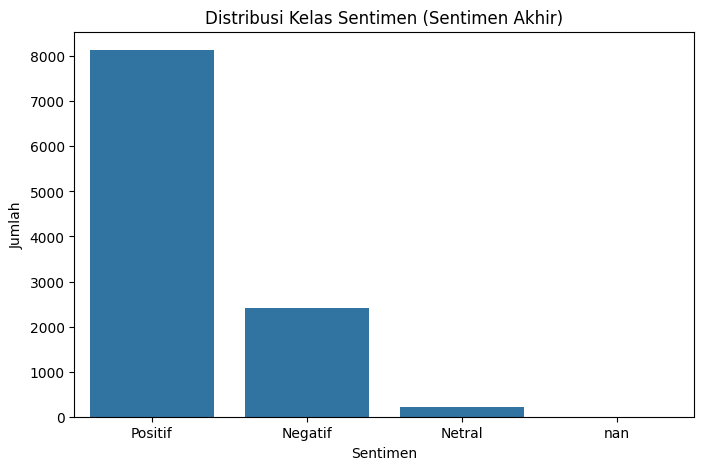


--- Informasi Kolom 'score' ---
Distribusi nilai 'score':
score
1    1707
2     299
3     314
4     733
5    7745
Name: count, dtype: int64


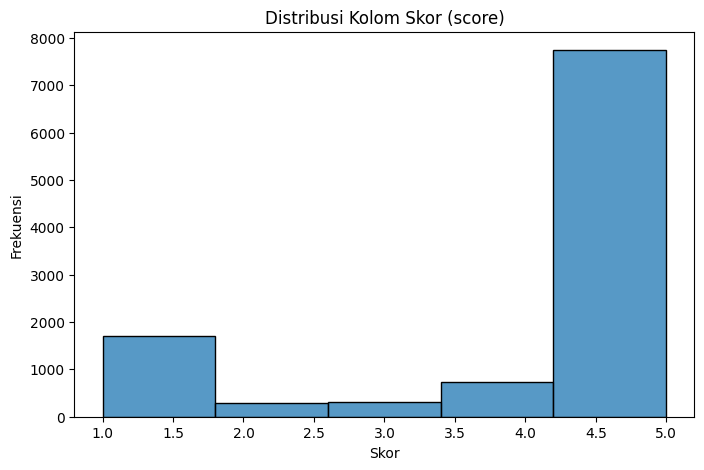


[FASE 0.0] Overview Dataset Awal Selesai dalam 0.19 detik.
----------------------------------------------------------------------


In [45]:
# --- Blok 0.0: Overview Informasi Dataset Awal ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
print("[FASE 0.0] Memuat dan Melakukan Overview Dataset Awal...")
start_fase0_0_time = time.time() # Pastikan 'import time' sudah ada jika ini sel pertama

# --- Pemuatan Data Awal (Hanya untuk Overview) ---
csv_file_path = 'Data Pakai Label.csv' # Nama file CSV asli Anda

try:
    df_overview = pd.read_csv(csv_file_path)
    print(f"\n[INFO] Berhasil memuat file untuk overview: {csv_file_path}")
except FileNotFoundError:
    print(f"[ERROR] File '{csv_file_path}' tidak ditemukan. Pastikan path file benar.")
    exit()
except Exception as e:
    print(f"[ERROR] Terjadi kesalahan saat memuat data: {e}")
    exit()

# --- Informasi Dasar Dataset ---
print("\n--- Informasi Dasar Dataset ---")
print(f"Jumlah Baris (Sampel): {df_overview.shape[0]}")
print(f"Jumlah Kolom (Fitur): {df_overview.shape[1]}")

print("\nNama Kolom:")
print(df_overview.columns.tolist())

print("\nBeberapa Baris Pertama Data:")
print(df_overview.head())

print("\nInfo Tipe Data dan Missing Values per Kolom:")
df_overview.info()

print("\nStatistik Deskriptif untuk Kolom Numerik (jika ada, misal 'score'):")
# Hanya tampilkan statistik untuk kolom yang benar-benar numerik
numeric_cols = df_overview.select_dtypes(include=['number']).columns
if not numeric_cols.empty:
    print(df_overview[numeric_cols].describe())
else:
    print("Tidak ada kolom numerik untuk statistik deskriptif.")

# --- Informasi Spesifik Kolom yang Relevan ---
content_col = 'content' # Kolom teks asli Bahasa Indonesia
sentiment_col_akhir = 'Sentimen Akhir' # Kolom sentimen target

if content_col in df_overview.columns:
    print(f"\n--- Informasi Kolom Teks Asli ('{content_col}') ---")
    print(f"Jumlah nilai unik: {df_overview[content_col].nunique()}")
    print(f"Jumlah nilai kosong (NaN): {df_overview[content_col].isnull().sum()}")
    # Contoh teks
    if not df_overview[content_col].isnull().all(): # Cek jika tidak semua NaN
        print("\nContoh beberapa teks:")
        print(df_overview[content_col].dropna().sample(min(5, len(df_overview[content_col].dropna()))).values) # Ambil sampel 5 teks non-NaN
else:
    print(f"[PERINGATAN] Kolom '{content_col}' tidak ditemukan.")


if sentiment_col_akhir in df_overview.columns:
    print(f"\n--- Informasi Kolom Target ('{sentiment_col_akhir}') ---")
    print(f"Distribusi Kelas Sentimen ('{sentiment_col_akhir}'):")
    sentiment_counts = df_overview[sentiment_col_akhir].value_counts(dropna=False) # dropna=False untuk melihat NaN juga
    print(sentiment_counts)
    print(f"\nJumlah nilai kosong (NaN) di '{sentiment_col_akhir}': {df_overview[sentiment_col_akhir].isnull().sum()}")

    # Visualisasi Distribusi Kelas Sentimen
    if not sentiment_counts.empty:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df_overview, x=sentiment_col_akhir, order=sentiment_counts.index)
        plt.title(f'Distribusi Kelas Sentimen ({sentiment_col_akhir})')
        plt.xlabel('Sentimen')
        plt.ylabel('Jumlah')
        plt.show()
else:
    print(f"[PERINGATAN] Kolom '{sentiment_col_akhir}' tidak ditemukan.")


# Informasi tentang kolom skor (jika relevan untuk dipahami distribusinya)
score_col = 'score'
if score_col in df_overview.columns and pd.api.types.is_numeric_dtype(df_overview[score_col]):
    print(f"\n--- Informasi Kolom '{score_col}' ---")
    print(f"Distribusi nilai '{score_col}':")
    print(df_overview[score_col].value_counts(dropna=False).sort_index())
    
    plt.figure(figsize=(8, 5))
    sns.histplot(df_overview[score_col], kde=False, bins=df_overview[score_col].nunique()) # bins disesuaikan dengan jumlah nilai unik
    plt.title(f'Distribusi Kolom Skor ({score_col})')
    plt.xlabel('Skor')
    plt.ylabel('Frekuensi')
    plt.show()
elif score_col in df_overview.columns:
    print(f"\n[PERINGATAN] Kolom '{score_col}' ditemukan tetapi bukan tipe numerik. Distribusi tidak divisualisasikan.")
else:
    print(f"[INFO] Kolom '{score_col}' tidak ditemukan.")


end_fase0_0_time = time.time()
print(f"\n[FASE 0.0] Overview Dataset Awal Selesai dalam {end_fase0_0_time - start_fase0_0_time:.2f} detik.")
print("-" * 70)

In [46]:
# --- Blok 0: Inisialisasi, Fungsi-Fungsi Global, dan Pemuatan Data (Handling Hasil Translasi) ---
import pandas as pd
import re
import string
import nltk
import ssl
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as nltk_stopwords, sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from afinn import Afinn
from textblob import TextBlob
from senticnet.senticnet import SenticNet
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

# --- Konfigurasi dan Download Resource NLTK (DEFINISI FUNGSI DI SINI) ---
def download_nltk_resources():
    try:
        _create_unverified_https_context = ssl._create_unverified_context
    except AttributeError:
        pass
    else:
        ssl._create_default_https_context = _create_unverified_https_context

    resources = {
        "punkt": "tokenizers/punkt",
        "stopwords": "corpora/stopwords",
        "averaged_perceptron_tagger": "taggers/averaged_perceptron_tagger",
        "wordnet": "corpora/wordnet",
        "omw-1.4": "corpora/omw-1.4",
        "sentiwordnet": "corpora/sentiwordnet"
    }
    
    for resource_name, resource_path in resources.items():
        try:
            nltk.data.find(resource_path)
            print(f"[INFO] NLTK resource '{resource_name}' ({resource_path}) sudah ada.")
        except LookupError:
            print(f"[INFO] NLTK resource '{resource_name}' ({resource_path}) tidak ditemukan. Mengunduh...")
            try:
                nltk.download(resource_name, quiet=True)
                print(f"[INFO] Berhasil mengunduh '{resource_name}'.")
            except Exception as e:
                print(f"[ERROR] Gagal mengunduh '{resource_name}': {e}")
                print(f"         Coba jalankan secara manual: nltk.download('{resource_name}')")
        except Exception as e:
            print(f"[ERROR] Error saat memeriksa resource {resource_name}: {e}")

# --- PANGGIL FUNGSI SETELAH DEFINISI ---
download_nltk_resources()
print("-" * 50)

# Fungsi untuk memberi label sentimen berdasarkan skor
def label_sentiment(score, pos_thresh=0.05, neg_thresh=-0.05):
    if score > pos_thresh:
        return "Positif"
    elif score < neg_thresh:
        return "Negatif"
    else:
        return "Netral"
# ... (sisa kode Blok 0 seperti pada versi terakhir yang Anda setujui) ...

# --- Pemuatan Data dan Handling Hasil Translasi ---
csv_file_path_original = 'Data Pakai Label.csv'
path_data_sudah_translasi = 'Data_Dengan_Kolom_Terjemahan.csv' 
translated_column_name = 'translated_content'
content_column_original = 'content'
sample_size = 10798
DO_SAMPLING = True
TRANSLATE_IF_MISSING = False # Set True jika ingin translasi otomatis jika file tidak ada

df_processed = None

if os.path.exists(path_data_sudah_translasi):
    try:
        print(f"[INFO] Mencoba memuat data yang sudah ditranslasi dari: {path_data_sudah_translasi}")
        df_temp = pd.read_csv(path_data_sudah_translasi)
        if translated_column_name in df_temp.columns:
            df_processed = df_temp
            print(f"[INFO] Berhasil memuat data dengan kolom terjemahan. Jumlah baris: {len(df_processed)}")
        else:
            print(f"[PERINGATAN] File '{path_data_sudah_translasi}' ditemukan, tetapi tidak ada kolom '{translated_column_name}'.")
            df_processed = None
    except Exception as e:
        print(f"[PERINGATAN] Gagal memuat file '{path_data_sudah_translasi}': {e}.")
        df_processed = None

if df_processed is None:
    print(f"[INFO] File '{path_data_sudah_translasi}' tidak ditemukan atau tidak valid. Memproses dari '{csv_file_path_original}'.")
    try:
        df_original_load = pd.read_csv(csv_file_path_original)
        print(f"[INFO] Berhasil memuat file asli: {csv_file_path_original}. Baris: {len(df_original_load)}")

        if content_column_original not in df_original_load.columns:
            print(f"[ERROR] Kolom '{content_column_original}' (untuk translasi) tidak ditemukan di {csv_file_path_original}.")
            exit()
        
        df_to_translate = df_original_load.copy()

        if TRANSLATE_IF_MISSING:
            # Anda perlu library transformers di sini jika flag ini True
            try:
                from transformers import MarianMTModel, MarianTokenizer
            except ImportError:
                print("[ERROR] Library 'transformers' tidak terinstal. Tidak bisa melakukan translasi otomatis.")
                print("         Silakan instal dengan 'pip install transformers sentencepiece sacremoses' atau set TRANSLATE_IF_MISSING = False.")
                exit()

            model_name_translation = "Helsinki-NLP/opus-mt-id-en"
            def translate_batch_hf(texts_series, model_name="Helsinki-NLP/opus-mt-id-en", batch_size=8):
                print(f"[INFO] Memuat model translasi: {model_name}")
                tokenizer = MarianTokenizer.from_pretrained(model_name)
                model = MarianMTModel.from_pretrained(model_name)
                print("[INFO] Model translasi dimuat.")
                texts = texts_series.tolist()
                translated_texts = []
                num_batches = (len(texts) + batch_size - 1) // batch_size
                for i in range(num_batches):
                    start_idx = i * batch_size
                    end_idx = min((i + 1) * batch_size, len(texts))
                    batch_texts_cleaned = [str(text) if pd.notnull(text) else "" for text in texts[start_idx:end_idx]]
                    print(f"[INFO] Menerjemahkan batch {i+1}/{num_batches} (ukuran: {len(batch_texts_cleaned)})...")
                    try:
                        inputs = tokenizer(batch_texts_cleaned, return_tensors="pt", padding=True, truncation=True, max_length=512)
                        translated_tokens = model.generate(**inputs)
                        batch_translated = [tokenizer.decode(t, skip_special_tokens=True) for t in translated_tokens]
                        translated_texts.extend(batch_translated)
                    except Exception as e:
                        print(f"[ERROR] Gagal menerjemahkan batch {i+1}: {e}")
                        translated_texts.extend(["ERROR_TRANSLATION"] * len(batch_texts_cleaned))
                    time.sleep(0.1)
                return pd.Series(translated_texts, index=texts_series.index)

            print(f"[INFO] Melakukan translasi otomatis untuk kolom '{content_column_original}'...")
            start_translate_time = time.time()
            df_to_translate[translated_column_name] = translate_batch_hf(df_to_translate[content_column_original])
            end_translate_time = time.time()
            print(f"[INFO] Proses translasi selesai dalam {end_translate_time - start_translate_time:.2f} detik.")
        
        elif translated_column_name not in df_to_translate.columns:
            print(f"[PERINGATAN KRUSIAL] TRANSLATE_IF_MISSING=False dan kolom '{translated_column_name}' tidak ada di '{csv_file_path_original}'.")
            print(f"                     Menggunakan konten asli Bahasa Indonesia di kolom '{translated_column_name}'. HASIL ANALISIS AKAN SANGAT TIDAK AKURAT.")
            df_to_translate[translated_column_name] = df_to_translate[content_column_original]

        try:
            df_to_translate.to_csv(path_data_sudah_translasi, index=False, encoding='utf-8-sig')
            print(f"[INFO] Data dengan kolom terjemahan disimpan ke: {path_data_sudah_translasi}")
            df_processed = df_to_translate.copy()
        except Exception as e:
            print(f"[ERROR] Gagal menyimpan data yang sudah ditranslasi ke '{path_data_sudah_translasi}': {e}")
            df_processed = df_to_translate.copy() if translated_column_name in df_to_translate.columns else None

    except FileNotFoundError:
        print(f"[ERROR] File asli '{csv_file_path_original}' tidak ditemukan dan '{path_data_sudah_translasi}' juga tidak ada.")
        exit()
    except Exception as e:
        print(f"[ERROR] Terjadi kesalahan saat memproses dari file asli: {e}")
        exit()

if df_processed is not None and DO_SAMPLING:
    if len(df_processed) > sample_size:
        print(f"[INFO] Melakukan sampling sebanyak {sample_size} baris dari data yang telah diproses/ditranslasi.")
        df = df_processed.sample(n=sample_size, random_state=42).reset_index(drop=True)
    else:
        print(f"[INFO] Ukuran data yang telah diproses ({len(df_processed)}) <= sample_size. Menggunakan seluruh data tersebut.")
        df = df_processed.copy()
elif df_processed is not None:
    df = df_processed.copy()
    print(f"[INFO] Menggunakan seluruh data yang telah diproses/ditranslasi ({len(df)} baris).")
else:
    print("[ERROR] Tidak ada data yang berhasil dimuat atau diproses. Keluar.")
    exit()

if translated_column_name not in df.columns:
    print(f"[ERROR AKHIR] Kolom '{translated_column_name}' tidak ditemukan di DataFrame 'df' final.")
    exit()

print(f"\n[INFO] Jumlah baris data yang akan dianalisis: {len(df)}")
print("Contoh data yang akan dianalisis (2 baris pertama):")
# Tampilkan kolom yang pasti ada di df awal dan kolom terjemahan
cols_to_show_sample = [col for col in [content_column_original, translated_column_name, 'Sentimen Akhir'] if col in df.columns]
print(df[cols_to_show_sample].head(2))
print("-" * 50)

[INFO] NLTK resource 'punkt' (tokenizers/punkt) sudah ada.
[INFO] NLTK resource 'stopwords' (corpora/stopwords) sudah ada.
[INFO] NLTK resource 'averaged_perceptron_tagger' (taggers/averaged_perceptron_tagger) sudah ada.
[INFO] NLTK resource 'wordnet' (corpora/wordnet) tidak ditemukan. Mengunduh...
[INFO] Berhasil mengunduh 'wordnet'.
[INFO] NLTK resource 'omw-1.4' (corpora/omw-1.4) tidak ditemukan. Mengunduh...
[INFO] Berhasil mengunduh 'omw-1.4'.
[INFO] NLTK resource 'sentiwordnet' (corpora/sentiwordnet) sudah ada.
--------------------------------------------------
[INFO] Mencoba memuat data yang sudah ditranslasi dari: Data_Dengan_Kolom_Terjemahan.csv
[INFO] Berhasil memuat data dengan kolom terjemahan. Jumlah baris: 10798
[INFO] Ukuran data yang telah diproses (10798) <= sample_size. Menggunakan seluruh data tersebut.

[INFO] Jumlah baris data yang akan dianalisis: 10798
Contoh data yang akan dianalisis (2 baris pertama):
                                             content  \
0  S

In [47]:
import nltk
nltk.download('punkt')
import nltk
print(nltk.data.path)



import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

['/home/xerces/nltk_data', '/home/xerces/anaconda3/envs/venv/nltk_data', '/home/xerces/anaconda3/envs/venv/share/nltk_data', '/home/xerces/anaconda3/envs/venv/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt to /home/xerces/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/xerces/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/xerces/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [48]:
# --- Blok 1: Preprocessing Teks Bahasa Inggris ---
print("[FASE 1] Memulai preprocessing teks Bahasa Inggris...")
start_fase1_time = time.time()

# Fungsi-fungsi preprocessing
def to_lowercase(text):
    return text.lower() if isinstance(text, str) else ""

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_mentions_hashtags(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    return text

def remove_punctuation(text):
    # Simpan tanda apostrof karena penting untuk kontraksi (misal, "don't")
    # punctuation_to_remove = string.punctuation.replace("'", "") 
    # return text.translate(str.maketrans('', '', punctuation_to_remove))
    # Untuk dictionary-based, seringkali lebih baik menghilangkan semua punctuation
    return text.translate(str.maketrans('', '', string.punctuation))


def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_extra_whitespace(text):
    return " ".join(text.split())

stop_words_en = set(nltk_stopwords.words('english'))
# Kata-kata negasi penting, jangan dihapus jika ada di kamus
negation_words = {"not", "no", "n't", "never", "don't", "can't", "isn't"}
stop_words_en = stop_words_en - negation_words

def remove_en_stopwords(tokens):
    return [word for word in tokens if word not in stop_words_en]

lemmatizer = WordNetLemmatizer()
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif nltk_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return None

def lemmatize_tokens_with_pos(tokens):
    nltk_tagged = nltk.pos_tag(tokens)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return lemmatized_sentence

# Pengecekan kolom hasil terjemahan
if translated_column_name not in df.columns:
    print(f"[ERROR] Kolom terjemahan '{translated_column_name}' tidak ada di DataFrame. Pastikan Fase 0 (Translasi) sudah benar.")
    exit()

# Menghapus baris jika teks terjemahan kosong
df.dropna(subset=[translated_column_name], inplace=True)
df.reset_index(drop=True, inplace=True)
print(f"Jumlah baris setelah menghapus NaN di '{translated_column_name}': {len(df)}")

# Pipeline Preprocessing
df['processed_text'] = df[translated_column_name].apply(to_lowercase)
df['processed_text'] = df['processed_text'].apply(remove_urls)
df['processed_text'] = df['processed_text'].apply(remove_mentions_hashtags)
df['textblob_ready_text'] = df['processed_text'].copy() # Untuk TextBlob, sebelum hapus tanda baca sepenuhnya

df['processed_text'] = df['processed_text'].apply(remove_punctuation)
df['processed_text'] = df['processed_text'].apply(remove_numbers)
df['processed_text'] = df['processed_text'].apply(remove_extra_whitespace)

from nltk.tokenize import word_tokenize # Tambahkan/pastikan ini ada di Blok 1
df['tokens'] = df['processed_text'].apply(word_tokenize)
# STOPWORD REMOVAL DI-NONAKTIFKAN untuk dictionary based, bisa diaktifkan jika diperlukan
# df['tokens_no_stopwords'] = df['tokens'].apply(remove_en_stopwords)

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens_with_pos)

end_fase1_time = time.time()
print(f"[FASE 1] Preprocessing teks selesai dalam {end_fase1_time - start_fase1_time:.2f} detik.")
print("\nContoh hasil preprocessing (5 baris pertama):")
print(df[[translated_column_name, 'processed_text', 'tokens', 'lemmatized_tokens']].head())
print("-" * 50)

[FASE 1] Memulai preprocessing teks Bahasa Inggris...
Jumlah baris setelah menghapus NaN di 'translated_content': 10798
[FASE 1] Preprocessing teks selesai dalam 2.36 detik.

Contoh hasil preprocessing (5 baris pertama):
                                  translated_content  \
0  Saya kasi bintang 1 dulu ya. Tolong diperbaiki...   
1  Apknya memudahkan dalam perubahan data, ngecek...   
2  Saya mau merubah data KIS saya di aplikasi jkn...   
3  Faskes tidak bisa di search, dan yang ditampil...   
4  Kenapa ketika ingin masuk akun ada pendaftaran...   

                                      processed_text  \
0  saya kasi bintang dulu ya tolong diperbaiki di...   
1  apknya memudahkan dalam perubahan data ngecek ...   
2  saya mau merubah data kis saya di aplikasi jkn...   
3  faskes tidak bisa di search dan yang ditampilk...   
4  kenapa ketika ingin masuk akun ada pendaftaran...   

                                              tokens  \
0  [saya, kasi, bintang, dulu, ya, tolong, diperb

In [49]:
# --- Blok 2.1: Analisis Sentimen dengan AFINN ---
print("[FASE 2.1] Menerapkan analisis sentimen AFINN...")
start_fase2_1_time = time.time()

afinn_lexicon = Afinn()
def get_afinn_score(tokens):
    if not tokens: return 0
    # Afinn library bisa langsung menerima string, join token lebih baik
    return afinn_lexicon.score(" ".join(tokens))

df['afinn_score'] = df['tokens'].apply(get_afinn_score) # Menggunakan token asli (bukan lemmatized)
df['afinn_label'] = df['afinn_score'].apply(lambda x: label_sentiment(x, pos_thresh=0.1, neg_thresh=-0.1))

end_fase2_1_time = time.time()
print(f"[FASE 2.1] Analisis AFINN selesai dalam {end_fase2_1_time - start_fase2_1_time:.2f} detik.")
print("\nContoh hasil AFINN:")
print(df[[translated_column_name, 'afinn_score', 'afinn_label']].head())
print("-" * 50)

[FASE 2.1] Menerapkan analisis sentimen AFINN...
[FASE 2.1] Analisis AFINN selesai dalam 1.99 detik.

Contoh hasil AFINN:
                                  translated_content  afinn_score afinn_label
0  Saya kasi bintang 1 dulu ya. Tolong diperbaiki...          0.0      Netral
1  Apknya memudahkan dalam perubahan data, ngecek...         -1.0     Negatif
2  Saya mau merubah data KIS saya di aplikasi jkn...          0.0      Netral
3  Faskes tidak bisa di search, dan yang ditampil...          0.0      Netral
4  Kenapa ketika ingin masuk akun ada pendaftaran...          0.0      Netral
--------------------------------------------------


In [50]:
# --- Blok 2.2: Analisis Sentimen dengan SentiWordNet ---
print("[FASE 2.2] Menerapkan analisis sentimen SentiWordNet...")
start_fase2_2_time = time.time()

def get_sentiwordnet_score(lemmatized_tokens_with_pos_tags):
    if not lemmatized_tokens_with_pos_tags:
        return 0.0, 0.0, 0.0

    sentiment_score_doc = 0.0
    pos_score_doc = 0.0
    neg_score_doc = 0.0
    
    # Kita sudah punya lemmatized_tokens, sekarang tinggal POS taggingnya
    # Jika lemmatized_tokens sudah punya POS tag, langsung gunakan.
    # Jika tidak, lakukan POS tagging pada lemmatized_tokens.
    # Untuk SentiWordNet, kata harus dilematisasi DENGAN POS tag yang benar.

    tagged_tokens = nltk.pos_tag(lemmatized_tokens_with_pos_tags) # POS tag pada token lemmatized

    for word, tag in tagged_tokens:
        wn_tag = nltk_tag_to_wordnet_tag(tag) # Fungsi ini sudah didefinisikan di Blok 1
        if wn_tag not in (nltk.corpus.wordnet.NOUN, nltk.corpus.wordnet.ADJ, 
                           nltk.corpus.wordnet.ADV, nltk.corpus.wordnet.VERB):
            continue

        # Lemmatize lagi dengan POS tag yang benar untuk SentiWordNet
        # (Meskipun sudah dilematisasi, terkadang bentuknya belum 100% dasar tanpa POS spesifik)
        lemma = lemmatizer.lemmatize(word, wn_tag) if wn_tag else word 
        
        synsets = list(swn.senti_synsets(lemma, wn_tag))
        if not synsets:
            # Jika tidak ada synset untuk lemma+tag, coba tanpa tag
            synsets = list(swn.senti_synsets(lemma))
            if not synsets:
                continue
        
        # Ambil skor dari synset pertama (paling umum)
        synset = synsets[0]
        pos_score = synset.pos_score()
        neg_score = synset.neg_score()
        
        pos_score_doc += pos_score
        neg_score_doc += neg_score
        sentiment_score_doc += (pos_score - neg_score)
        
    return pos_score_doc, neg_score_doc, sentiment_score_doc

swn_scores = df['lemmatized_tokens'].apply(get_sentiwordnet_score)
df['swn_pos_score'] = swn_scores.apply(lambda x: x[0])
df['swn_neg_score'] = swn_scores.apply(lambda x: x[1])
df['swn_sentiment_score'] = swn_scores.apply(lambda x: x[2])
df['swn_label'] = df['swn_sentiment_score'].apply(label_sentiment)

end_fase2_2_time = time.time()
print(f"[FASE 2.2] Analisis SentiWordNet selesai dalam {end_fase2_2_time - start_fase2_2_time:.2f} detik.")
print("\nContoh hasil SentiWordNet:")
print(df[[translated_column_name, 'swn_sentiment_score', 'swn_label']].head())
print("-" * 50)

[FASE 2.2] Menerapkan analisis sentimen SentiWordNet...
[FASE 2.2] Analisis SentiWordNet selesai dalam 2.80 detik.

Contoh hasil SentiWordNet:
                                  translated_content  swn_sentiment_score  \
0  Saya kasi bintang 1 dulu ya. Tolong diperbaiki...                 0.00   
1  Apknya memudahkan dalam perubahan data, ngecek...                 0.25   
2  Saya mau merubah data KIS saya di aplikasi jkn...                 0.25   
3  Faskes tidak bisa di search, dan yang ditampil...                 0.25   
4  Kenapa ketika ingin masuk akun ada pendaftaran...                 0.00   

  swn_label  
0    Netral  
1   Positif  
2   Positif  
3   Positif  
4    Netral  
--------------------------------------------------


In [51]:
# --- Blok 2.3: Analisis Sentimen dengan SenticNet ---
print("[FASE 2.3] Menerapkan analisis sentimen SenticNet...")
start_fase2_3_time = time.time()

sn = SenticNet()
def get_senticnet_score(tokens_or_lemmas): # Bisa pakai tokens atau lemmatized_tokens
    if not tokens_or_lemmas: return 0.0
    
    score = 0.0
    count = 0
    for token in tokens_or_lemmas:
        try:
            # SenticNet bekerja dengan konsep, jadi lowercase
            concept_info = sn.concept(token.lower()) 
            polarity_value = float(concept_info['polarity_value'])
            score += polarity_value
            count += 1
        except KeyError: # Konsep tidak ditemukan di SenticNet
            continue
    return score / count if count > 0 else 0.0

# Coba dengan lemmatized_tokens karena SenticNet berbasis konsep
df['senticnet_score'] = df['lemmatized_tokens'].apply(get_senticnet_score) 
df['senticnet_label'] = df['senticnet_score'].apply(label_sentiment)

end_fase2_3_time = time.time()
print(f"[FASE 2.3] Analisis SenticNet selesai dalam {end_fase2_3_time - start_fase2_3_time:.2f} detik.")
print("\nContoh hasil SenticNet:")
print(df[[translated_column_name, 'senticnet_score', 'senticnet_label']].head())
print("-" * 50)

[FASE 2.3] Menerapkan analisis sentimen SenticNet...
[FASE 2.3] Analisis SenticNet selesai dalam 0.04 detik.

Contoh hasil SenticNet:
                                  translated_content  senticnet_score  \
0  Saya kasi bintang 1 dulu ya. Tolong diperbaiki...         0.846333   
1  Apknya memudahkan dalam perubahan data, ngecek...         0.000000   
2  Saya mau merubah data KIS saya di aplikasi jkn...         0.857000   
3  Faskes tidak bisa di search, dan yang ditampil...         0.870333   
4  Kenapa ketika ingin masuk akun ada pendaftaran...         0.068000   

  senticnet_label  
0         Positif  
1          Netral  
2         Positif  
3         Positif  
4         Positif  
--------------------------------------------------


In [52]:
# --- Blok 2.4: Analisis Sentimen dengan TextBlob ---
print("[FASE 2.4] Menerapkan analisis sentimen TextBlob...")
start_fase2_4_time = time.time()

def get_textblob_sentiment(text):
    if not isinstance(text, str) or not text.strip(): # Handle empty or non-string
        return 0.0, 0.0
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Gunakan 'textblob_ready_text' yang masih memiliki beberapa tanda baca
textblob_sentiments = df['textblob_ready_text'].apply(get_textblob_sentiment)
df['textblob_polarity'] = textblob_sentiments.apply(lambda x: x[0])
df['textblob_subjectivity'] = textblob_sentiments.apply(lambda x: x[1])
df['textblob_label'] = df['textblob_polarity'].apply(label_sentiment)

end_fase2_4_time = time.time()
print(f"[FASE 2.4] Analisis TextBlob selesai dalam {end_fase2_4_time - start_fase2_4_time:.2f} detik.")
print("\nContoh hasil TextBlob:")
print(df[[translated_column_name, 'textblob_polarity', 'textblob_label']].head())
print("-" * 50)

[FASE 2.4] Menerapkan analisis sentimen TextBlob...
[FASE 2.4] Analisis TextBlob selesai dalam 0.78 detik.

Contoh hasil TextBlob:
                                  translated_content  textblob_polarity  \
0  Saya kasi bintang 1 dulu ya. Tolong diperbaiki...                0.0   
1  Apknya memudahkan dalam perubahan data, ngecek...                0.0   
2  Saya mau merubah data KIS saya di aplikasi jkn...                0.0   
3  Faskes tidak bisa di search, dan yang ditampil...                0.0   
4  Kenapa ketika ingin masuk akun ada pendaftaran...                0.0   

  textblob_label  
0         Netral  
1         Netral  
2         Netral  
3         Netral  
4         Netral  
--------------------------------------------------


In [53]:
# --- Blok 3: Tampilkan Hasil Gabungan dari Semua Kamus ---
print("[FASE 3] Menampilkan contoh hasil analisis gabungan (10 baris pertama):")

# Pastikan kolom Sentimen Akhir ada untuk perbandingan
ground_truth_col = 'Sentimen Akhir'
columns_to_display = ['content', translated_column_name]
if ground_truth_col in df.columns:
    columns_to_display.append(ground_truth_col)

columns_to_display.extend([
    'afinn_score', 'afinn_label', 
    'swn_sentiment_score', 'swn_label',
    'senticnet_score', 'senticnet_label',
    'textblob_polarity', 'textblob_label'
])

# Filter kolom yang benar-benar ada di DataFrame untuk menghindari error
columns_to_display = [col for col in columns_to_display if col in df.columns]

print(df[columns_to_display].head(10))
print("-" * 50)

[FASE 3] Menampilkan contoh hasil analisis gabungan (10 baris pertama):
                                             content  \
0  Saya kasi bintang 1 dulu ya. Tolong diperbaiki...   
1  Apknya memudahkan dalam perubahan data, ngecek...   
2  Saya mau merubah data KIS saya di aplikasi jkn...   
3  Faskes tidak bisa di search, dan yang ditampil...   
4  Kenapa ketika ingin masuk akun ada pendaftaran...   
5  Semua menu menampilkan "Permintaan anda belum ...   
6  Aplikasi terlalu ribett, bukannya mempermudah ...   
7  setelah saya download dan login kembali, tp yg...   
8  Setelah update aplikasinya, data di fitur Pend...   
9  Formasinya sudah bagus banyak menu, tapi pas s...   

                                  translated_content Sentimen Akhir  \
0  Saya kasi bintang 1 dulu ya. Tolong diperbaiki...        Negatif   
1  Apknya memudahkan dalam perubahan data, ngecek...        Positif   
2  Saya mau merubah data KIS saya di aplikasi jkn...        Negatif   
3  Faskes tidak bisa di sea

[FASE 4] Melakukan evaluasi dan visualisasi...

[INFO] Melakukan evaluasi berdasarkan kolom 'Sentimen Akhir'...

--- Evaluasi untuk Metode: AFINN ---
Akurasi: 0.1044
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Positif       0.97      0.08      0.15      8138
      Netral       0.02      0.95      0.04       208
     Negatif       0.89      0.11      0.19      2406

    accuracy                           0.10     10752
   macro avg       0.62      0.38      0.13     10752
weighted avg       0.93      0.10      0.16     10752



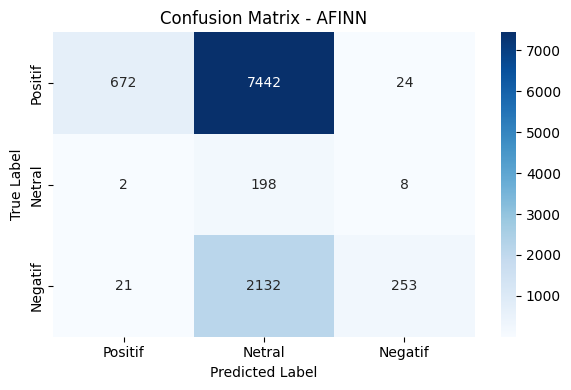


--- Evaluasi untuk Metode: SentiWordNet ---
Akurasi: 0.1246
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Positif       0.77      0.11      0.20      8138
      Netral       0.02      0.84      0.04       208
     Negatif       0.75      0.10      0.17      2406

    accuracy                           0.12     10752
   macro avg       0.51      0.35      0.14     10752
weighted avg       0.75      0.12      0.19     10752



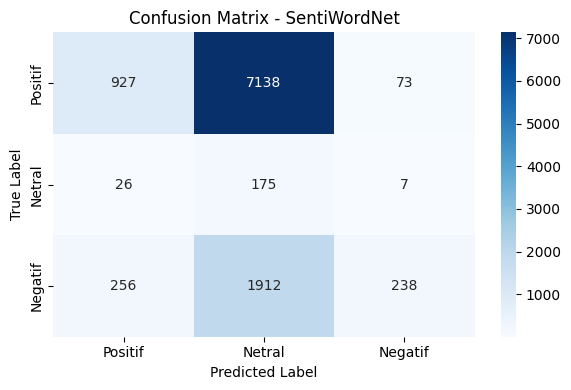


--- Evaluasi untuk Metode: SenticNet ---
Akurasi: 0.1858
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Positif       0.72      0.19      0.30      8138
      Netral       0.02      0.77      0.04       208
     Negatif       0.75      0.12      0.20      2406

    accuracy                           0.19     10752
   macro avg       0.49      0.36      0.18     10752
weighted avg       0.71      0.19      0.27     10752



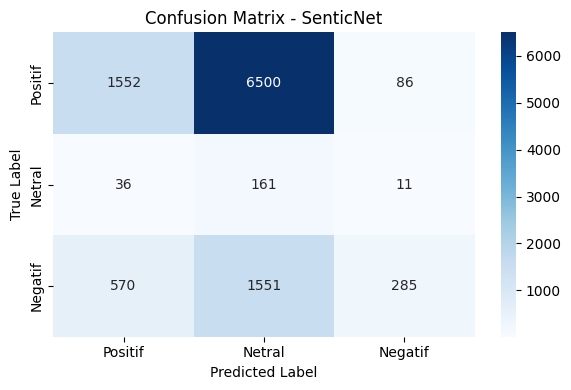


--- Evaluasi untuk Metode: TextBlob ---
Akurasi: 0.1419
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Positif       0.97      0.16      0.27      8138
      Netral       0.02      0.97      0.04       208
     Negatif       0.85      0.01      0.02      2406

    accuracy                           0.14     10752
   macro avg       0.61      0.38      0.11     10752
weighted avg       0.92      0.14      0.21     10752



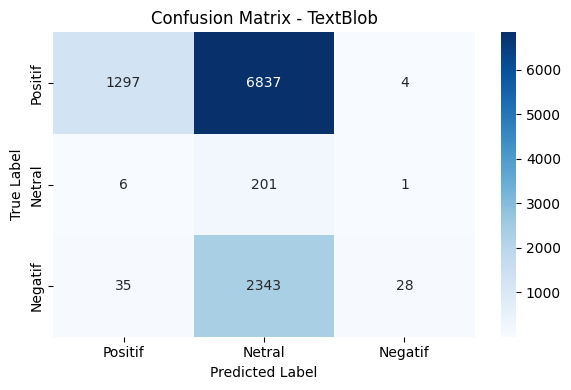



--- Tabel Perbandingan Kinerja Metode ---
         Method  Accuracy  Positif_Precision  Positif_Recall  Positif_F1-Score  Positif_Support  Netral_Precision  Netral_Recall  Netral_F1-Score  Netral_Support  Negatif_Precision  Negatif_Recall  Negatif_F1-Score  Negatif_Support  Macro_Avg_Precision  Macro_Avg_Recall  Macro_Avg_F1-Score  Weighted_Avg_Precision  Weighted_Avg_Recall  Weighted_Avg_F1-Score
0         AFINN  0.104446           0.966906        0.082576          0.152157           8138.0          0.020262       0.951923         0.039679           208.0           0.887719        0.105154          0.188034           2406.0             0.624963          0.379884            0.126623                0.930874             0.104446               0.158009
1  SentiWordNet  0.124628           0.766749        0.113910          0.198352           8138.0          0.018970       0.841346         0.037104           208.0           0.748428        0.098919          0.174743           2406.0       

In [54]:
# --- Blok 4: Evaluasi dan Visualisasi ---
print("[FASE 4] Melakukan evaluasi dan visualisasi...")
start_fase4_time = time.time()

ground_truth_column = 'Sentimen Akhir' # Kolom sentimen manual Anda
evaluation_results = [] # List untuk menyimpan hasil evaluasi

# Fungsi evaluate_sentiments_detailed yang dimodifikasi untuk mengembalikan metrik
def evaluate_sentiments_detailed(y_true, y_pred, method_name, labels_order=["Positif", "Netral", "Negatif"]):
    if len(y_true) == 0 or len(y_pred) == 0 or len(y_true) != len(y_pred):
        print(f"[PERINGATAN] Data tidak valid untuk evaluasi {method_name}. Panjang y_true: {len(y_true)}, y_pred: {len(y_pred)}")
        return None

    valid_indices = y_true.notna() & y_pred.notna()
    y_true_cleaned = y_true[valid_indices]
    y_pred_cleaned = y_pred[valid_indices]

    if len(y_true_cleaned) == 0:
        print(f"[PERINGATAN] Tidak ada data valid setelah membersihkan NaN untuk evaluasi {method_name}.")
        return None

    accuracy = accuracy_score(y_true_cleaned, y_pred_cleaned)
    unique_labels_data = sorted(list(set(y_true_cleaned.unique()) | set(y_pred_cleaned.unique())))
    current_labels_order = [l for l in labels_order if l in unique_labels_data]
    if not current_labels_order: current_labels_order = unique_labels_data

    report_dict = classification_report(y_true_cleaned, y_pred_cleaned, labels=current_labels_order, zero_division=0, output_dict=True)
    cm = confusion_matrix(y_true_cleaned, y_pred_cleaned, labels=current_labels_order)

    print(f"\n--- Evaluasi untuk Metode: {method_name} ---")
    print(f"Akurasi: {accuracy:.4f}")
    print("Laporan Klasifikasi:")
    # Untuk tampilan di konsol, kita bisa print report string
    print(classification_report(y_true_cleaned, y_pred_cleaned, labels=current_labels_order, zero_division=0))
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=current_labels_order, 
                yticklabels=current_labels_order)
    plt.title(f'Confusion Matrix - {method_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    
    # Kumpulkan metrik untuk tabel perbandingan
    metrics = {'Method': method_name, 'Accuracy': accuracy}
    for label in current_labels_order:
        if label in report_dict:
            metrics[f'{label}_Precision'] = report_dict[label]['precision']
            metrics[f'{label}_Recall'] = report_dict[label]['recall']
            metrics[f'{label}_F1-Score'] = report_dict[label]['f1-score']
            metrics[f'{label}_Support'] = report_dict[label]['support']
        else: # Jika label tidak ada di prediksi sama sekali
            metrics[f'{label}_Precision'] = 0
            metrics[f'{label}_Recall'] = 0
            metrics[f'{label}_F1-Score'] = 0
            metrics[f'{label}_Support'] = 0 # Atau ambil dari y_true.value_counts()
            
    if 'macro avg' in report_dict:
        metrics['Macro_Avg_Precision'] = report_dict['macro avg']['precision']
        metrics['Macro_Avg_Recall'] = report_dict['macro avg']['recall']
        metrics['Macro_Avg_F1-Score'] = report_dict['macro avg']['f1-score']
    if 'weighted avg' in report_dict:
        metrics['Weighted_Avg_Precision'] = report_dict['weighted avg']['precision']
        metrics['Weighted_Avg_Recall'] = report_dict['weighted avg']['recall']
        metrics['Weighted_Avg_F1-Score'] = report_dict['weighted avg']['f1-score']
        
    return metrics


if ground_truth_column in df.columns:
    print(f"\n[INFO] Melakukan evaluasi berdasarkan kolom '{ground_truth_column}'...")
    df_eval = df.copy()
    df_eval.dropna(subset=[ground_truth_column], inplace=True)
    df_eval.reset_index(drop=True, inplace=True)

    if not df_eval.empty:
        # Pastikan kolom label ada sebelum evaluasi
        if 'afinn_label' in df_eval.columns:
            metrics_afinn = evaluate_sentiments_detailed(df_eval[ground_truth_column], df_eval['afinn_label'], "AFINN")
            if metrics_afinn: evaluation_results.append(metrics_afinn)
        else: print("[PERINGATAN] Kolom 'afinn_label' tidak ditemukan untuk evaluasi.")

        if 'swn_label' in df_eval.columns:
            metrics_swn = evaluate_sentiments_detailed(df_eval[ground_truth_column], df_eval['swn_label'], "SentiWordNet")
            if metrics_swn: evaluation_results.append(metrics_swn)
        else: print("[PERINGATAN] Kolom 'swn_label' tidak ditemukan untuk evaluasi.")

        if 'senticnet_label' in df_eval.columns:
            metrics_senticnet = evaluate_sentiments_detailed(df_eval[ground_truth_column], df_eval['senticnet_label'], "SenticNet")
            if metrics_senticnet: evaluation_results.append(metrics_senticnet)
        else: print("[PERINGATAN] Kolom 'senticnet_label' tidak ditemukan untuk evaluasi.")

        if 'textblob_label' in df_eval.columns:
            metrics_textblob = evaluate_sentiments_detailed(df_eval[ground_truth_column], df_eval['textblob_label'], "TextBlob")
            if metrics_textblob: evaluation_results.append(metrics_textblob)
        else: print("[PERINGATAN] Kolom 'textblob_label' tidak ditemukan untuk evaluasi.")
        
        # Membuat tabel perbandingan
        if evaluation_results:
            df_comparison = pd.DataFrame(evaluation_results)
            # Atur urutan kolom agar lebih mudah dibaca
            ordered_columns = ['Method', 'Accuracy']
            labels_for_order = ["Positif", "Netral", "Negatif"] # Sesuai urutan yang diinginkan
            
            for label in labels_for_order:
                if f'{label}_Precision' in df_comparison.columns: # Cek jika kolom ada
                    ordered_columns.extend([f'{label}_Precision', f'{label}_Recall', f'{label}_F1-Score', f'{label}_Support'])
            
            # Tambahkan kolom rata-rata jika ada
            avg_cols_to_check = ['Macro_Avg_Precision', 'Macro_Avg_Recall', 'Macro_Avg_F1-Score', 
                                 'Weighted_Avg_Precision', 'Weighted_Avg_Recall', 'Weighted_Avg_F1-Score']
            for col in avg_cols_to_check:
                if col in df_comparison.columns:
                    ordered_columns.append(col)
            
            # Filter ordered_columns agar hanya berisi kolom yang benar-benar ada di df_comparison
            final_ordered_columns = [col for col in ordered_columns if col in df_comparison.columns]

            df_comparison = df_comparison[final_ordered_columns]
            
            print("\n\n--- Tabel Perbandingan Kinerja Metode ---")
            print(df_comparison.to_string()) # .to_string() untuk tampilan yang lebih baik di konsol
            
            # Simpan tabel perbandingan ke file CSV terpisah
            try:
                comparison_csv_path = 'Data_Perbandingan_Metode_Sentiment.csv'
                df_comparison.to_csv(comparison_csv_path, index=False, encoding='utf-8-sig')
                print(f"\n[INFO] Tabel perbandingan disimpan ke: {comparison_csv_path}")
            except Exception as e:
                print(f"[ERROR] Gagal menyimpan tabel perbandingan: {e}")
        else:
            print("[PERINGATAN] Tidak ada hasil evaluasi yang valid untuk membuat tabel perbandingan.")

    else:
        print(f"[PERINGATAN] Tidak ada data ground truth yang valid di kolom '{ground_truth_column}' untuk evaluasi.")
else:
    print(f"[INFO] Kolom ground truth '{ground_truth_column}' tidak ditemukan. Evaluasi dilewati.")

end_fase4_time = time.time()
print(f"[FASE 4] Evaluasi dan visualisasi selesai dalam {end_fase4_time - start_fase4_time:.2f} detik.")
print("-" * 50)

In [55]:
# --- Blok 5: Penyimpanan Hasil Akhir DataFrame Utama ---
print("[FASE 5] Menyimpan hasil akhir DataFrame utama...")

output_csv_path_main = 'Data_Hasil_Sentiment_Dictionaries_Lengkap.csv' # Ganti nama agar beda dengan tabel perbandingan
try:
    df.to_csv(output_csv_path_main, index=False, encoding='utf-8-sig')
    print(f"\n[INFO] Hasil lengkap (termasuk skor mentah) disimpan ke: {output_csv_path_main}")
except Exception as e:
    print(f"[ERROR] Gagal menyimpan file CSV utama: {e}")

print("--- Proses Selesai ---")

[FASE 5] Menyimpan hasil akhir DataFrame utama...

[INFO] Hasil lengkap (termasuk skor mentah) disimpan ke: Data_Hasil_Sentiment_Dictionaries_Lengkap.csv
--- Proses Selesai ---


In [56]:
# --- Blok 6: Persiapan Data untuk Model Machine Learning (Input 'processed_text', N-gram Dinamis) ---
import time
print("[FASE ML - PERSIAPAN] Fungsi persiapan data untuk model ML dengan N-gram dinamis (input: 'processed_text')...")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Pastikan DataFrame 'df' dari fase sebelumnya tersedia (Blok 0 dan 1)
if 'df' not in globals():
    print("[FATAL ERROR] DataFrame 'df' tidak ditemukan. Pastikan Blok 0 dan 1 sudah dijalankan.")
    raise NameError("DataFrame 'df' is not defined. Please run previous blocks.")

# Kolom yang akan selalu digunakan untuk ML dalam konfigurasi ini
TEXT_COLUMN_FOR_ML = 'processed_text' # Input teks untuk TF-IDF
TARGET_COLUMN_FOR_ML = 'Sentimen Akhir' # Ground truth

if TEXT_COLUMN_FOR_ML not in df.columns or TARGET_COLUMN_FOR_ML not in df.columns:
    print(f"[FATAL ERROR] Kolom '{TEXT_COLUMN_FOR_ML}' atau '{TARGET_COLUMN_FOR_ML}' tidak ditemukan di DataFrame 'df'.")
    raise KeyError(f"Required columns not found. Ensure '{TEXT_COLUMN_FOR_ML}' and '{TARGET_COLUMN_FOR_ML}' exist.")

# Fungsi untuk mempersiapkan data ML dengan ngram_range tertentu (menggunakan TEXT_COLUMN_FOR_ML)
def prepare_ml_data_for_specific_ngrams(df_input, ngram_range_config):
    """
    Mempersiapkan data untuk ML menggunakan 'processed_text' dan konfigurasi N-gram tertentu.
    Args:
        df_input: DataFrame input (seharusnya 'df' yang sudah punya 'processed_text').
        ngram_range_config: Tuple untuk ngram_range.
    Returns:
        Paket data ML atau None jika error.
    """
    print(f"\n--- Mempersiapkan data dengan N-gram: {ngram_range_config} (dari '{TEXT_COLUMN_FOR_ML}') ---")
    start_prep_time = time.time()

    # Pilih kolom yang relevan dan bersihkan NaN
    df_ml_current_prep = df_input[[TEXT_COLUMN_FOR_ML, TARGET_COLUMN_FOR_ML]].copy()
    df_ml_current_prep.dropna(subset=[TEXT_COLUMN_FOR_ML, TARGET_COLUMN_FOR_ML], inplace=True)
    df_ml_current_prep = df_ml_current_prep[df_ml_current_prep[TEXT_COLUMN_FOR_ML].str.strip() != '']

    if df_ml_current_prep.empty:
        print(f"[ERROR] Tidak ada data valid untuk N-gram: {ngram_range_config} setelah pembersihan.")
        return None, None, None, None, None, None, None, None # Tambah return untuk df_ml_current_prep.index

    X_text_current = df_ml_current_prep[TEXT_COLUMN_FOR_ML]
    y_labels_current = df_ml_current_prep[TARGET_COLUMN_FOR_ML]

    print(f"Jumlah data valid: {len(df_ml_current_prep)}")

    tfidf_vectorizer_current_ngram = TfidfVectorizer(
        max_features=5000,
        ngram_range=ngram_range_config,
        min_df=2,
        max_df=0.95
    )

    print(f"[INFO] Melakukan fit dan transform TF-IDF...")
    X_tfidf_current_ngram = tfidf_vectorizer_current_ngram.fit_transform(X_text_current)
    print(f"Dimensi matriks TF-IDF: {X_tfidf_current_ngram.shape}")

    label_encoder_current = LabelEncoder()
    y_encoded_current = label_encoder_current.fit_transform(y_labels_current)
    
    current_label_mapping_iter = {index: label for index, label in enumerate(label_encoder_current.classes_)}
    current_class_names_iter = list(label_encoder_current.classes_)
    print(f"Label mapping: {current_label_mapping_iter}")

    min_samples_per_class_iter = 2
    can_stratify_current = len(y_labels_current.unique()) > 1 and y_labels_current.value_counts().min() >= min_samples_per_class_iter

    if can_stratify_current:
        X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(
            X_tfidf_current_ngram, y_encoded_current, test_size=0.2, random_state=42, stratify=y_encoded_current
        )
    else:
        print(f"[PERINGATAN] Tidak dapat stratifikasi untuk N-gram {ngram_range_config}. Membagi tanpa stratifikasi.")
        X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(
            X_tfidf_current_ngram, y_encoded_current, test_size=0.2, random_state=42
        )
    
    # Dapatkan index asli dari data uji (df_ml_current_prep) untuk mencocokkan label kamus nanti
    # Ini harus dilakukan PADA INDEX dari df_ml_current_prep SEBELUM di-split menjadi X_text dan y_labels
    full_indices_current = df_ml_current_prep.index 
    if can_stratify_current:
        _, test_original_indices_current = train_test_split(full_indices_current, test_size=0.2, random_state=42, stratify=y_labels_current.loc[full_indices_current])
    else:
        _, test_original_indices_current = train_test_split(full_indices_current, test_size=0.2, random_state=42)

    end_prep_time = time.time()
    print(f"Persiapan data selesai dalam {end_prep_time - start_prep_time:.2f} detik.")
    
    return X_train_iter, X_test_iter, y_train_iter, y_test_iter, label_encoder_current, current_class_names_iter, tfidf_vectorizer_current_ngram, test_original_indices_current

print("[FASE ML - PERSIAPAN] Fungsi 'prepare_ml_data_for_specific_ngrams' telah didefinisikan.")
print("-" * 50)

[FASE ML - PERSIAPAN] Fungsi persiapan data untuk model ML dengan N-gram dinamis (input: 'processed_text')...
[FASE ML - PERSIAPAN] Fungsi 'prepare_ml_data_for_specific_ngrams' telah didefinisikan.
--------------------------------------------------


[FASE ML - EKSPERIMEN N-GRAM SPESIFIK & EVALUASI ML vs GROUND TRUTH]
[INFO] Akan menguji model ML dengan konfigurasi N-gram tunggal: [(1, 1), (2, 2), (3, 3), (4, 4)]


==================== MEMPROSES N-GRAM: (1, 1) UNTUK SEMUA MODEL ML ====================

--- Mempersiapkan data dengan N-gram: (1, 1) (dari 'processed_text') ---
Jumlah data valid: 10752
[INFO] Melakukan fit dan transform TF-IDF...
Dimensi matriks TF-IDF: (10752, 2607)
Label mapping: {0: 'Negatif', 1: 'Netral', 2: 'Positif'}
Persiapan data selesai dalam 0.07 detik.

--- Melatih dan Mengevaluasi: ML - Logistic Regression (Ngram: (1, 1)) ---
Pelatihan selesai dalam 0.03 detik.

--- Evaluasi untuk Metode: ML - Logistic Regression (Ngram: (1, 1)) ---
Akurasi: 0.9470
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.93      0.89      0.91       481
      Netral       1.00      0.02      0.05        42
     Positif       0.95      0.99      0.97      1628

    accuracy            

/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


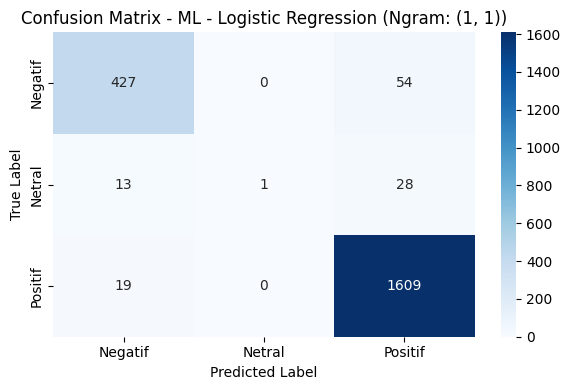


--- Melatih dan Mengevaluasi: ML - MLP Neural Network (Ngram: (1, 1)) ---
Pelatihan selesai dalam 4.81 detik.

--- Evaluasi untuk Metode: ML - MLP Neural Network (Ngram: (1, 1)) ---
Akurasi: 0.9512
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.92      0.92      0.92       481
      Netral       0.80      0.10      0.17        42
     Positif       0.96      0.98      0.97      1628

    accuracy                           0.95      2151
   macro avg       0.89      0.67      0.69      2151
weighted avg       0.95      0.95      0.94      2151



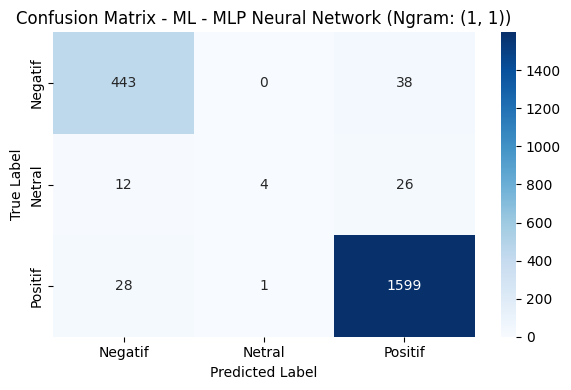


--- Melatih dan Mengevaluasi: ML - Naive Bayes (Multinomial) (Ngram: (1, 1)) ---
Pelatihan selesai dalam 0.00 detik.

--- Evaluasi untuk Metode: ML - Naive Bayes (Multinomial) (Ngram: (1, 1)) ---
Akurasi: 0.9521
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.90      0.94      0.92       481
      Netral       0.00      0.00      0.00        42
     Positif       0.97      0.98      0.97      1628

    accuracy                           0.95      2151
   macro avg       0.62      0.64      0.63      2151
weighted avg       0.93      0.95      0.94      2151



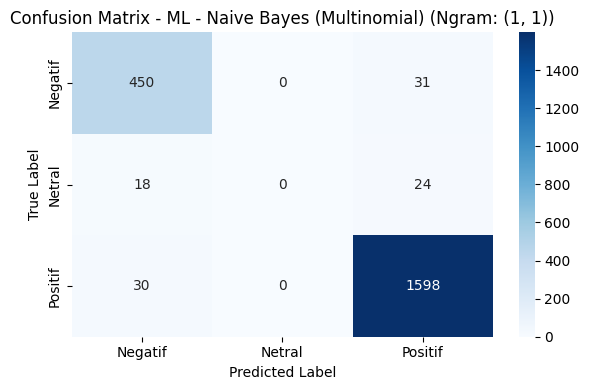



==================== MEMPROSES N-GRAM: (2, 2) UNTUK SEMUA MODEL ML ====================

--- Mempersiapkan data dengan N-gram: (2, 2) (dari 'processed_text') ---
Jumlah data valid: 10752
[INFO] Melakukan fit dan transform TF-IDF...
Dimensi matriks TF-IDF: (10752, 5000)
Label mapping: {0: 'Negatif', 1: 'Netral', 2: 'Positif'}
Persiapan data selesai dalam 0.13 detik.

--- Melatih dan Mengevaluasi: ML - Logistic Regression (Ngram: (2, 2)) ---
Pelatihan selesai dalam 0.02 detik.

--- Evaluasi untuk Metode: ML - Logistic Regression (Ngram: (2, 2)) ---
Akurasi: 0.8722
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.97      0.53      0.68       481
      Netral       0.00      0.00      0.00        42
     Positif       0.86      1.00      0.92      1628

    accuracy                           0.87      2151
   macro avg       0.61      0.51      0.54      2151
weighted avg       0.87      0.87      0.85      2151



/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


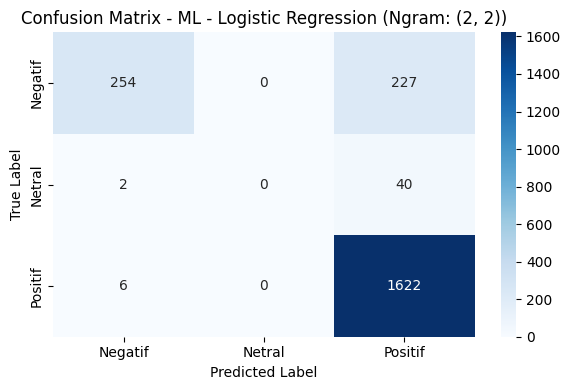


--- Melatih dan Mengevaluasi: ML - MLP Neural Network (Ngram: (2, 2)) ---
Pelatihan selesai dalam 9.41 detik.

--- Evaluasi untuk Metode: ML - MLP Neural Network (Ngram: (2, 2)) ---
Akurasi: 0.9284
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.93      0.81      0.86       481
      Netral       0.67      0.05      0.09        42
     Positif       0.93      0.99      0.96      1628

    accuracy                           0.93      2151
   macro avg       0.84      0.61      0.64      2151
weighted avg       0.92      0.93      0.92      2151



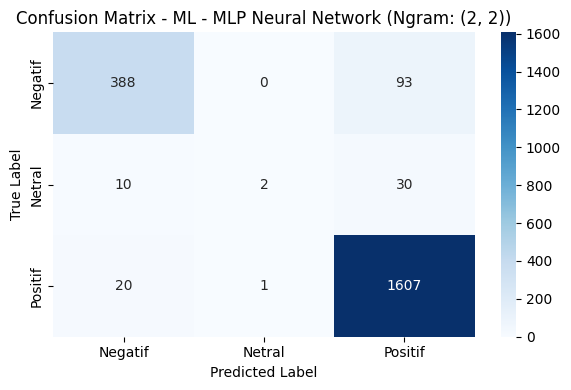


--- Melatih dan Mengevaluasi: ML - Naive Bayes (Multinomial) (Ngram: (2, 2)) ---
Pelatihan selesai dalam 0.00 detik.

--- Evaluasi untuk Metode: ML - Naive Bayes (Multinomial) (Ngram: (2, 2)) ---
Akurasi: 0.9098
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.95      0.71      0.81       481
      Netral       0.00      0.00      0.00        42
     Positif       0.90      0.99      0.95      1628

    accuracy                           0.91      2151
   macro avg       0.62      0.57      0.59      2151
weighted avg       0.89      0.91      0.90      2151



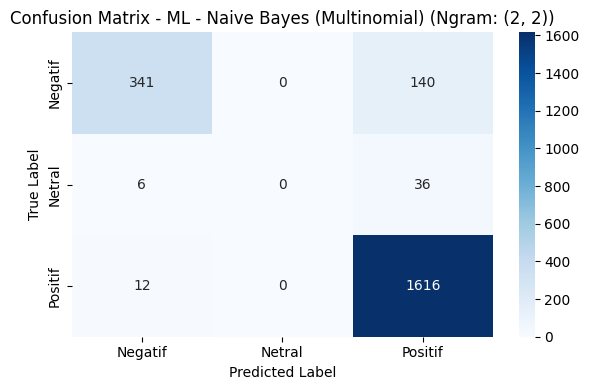



==================== MEMPROSES N-GRAM: (3, 3) UNTUK SEMUA MODEL ML ====================

--- Mempersiapkan data dengan N-gram: (3, 3) (dari 'processed_text') ---
Jumlah data valid: 10752
[INFO] Melakukan fit dan transform TF-IDF...
Dimensi matriks TF-IDF: (10752, 2987)
Label mapping: {0: 'Negatif', 1: 'Netral', 2: 'Positif'}
Persiapan data selesai dalam 0.16 detik.

--- Melatih dan Mengevaluasi: ML - Logistic Regression (Ngram: (3, 3)) ---
Pelatihan selesai dalam 0.01 detik.

--- Evaluasi untuk Metode: ML - Logistic Regression (Ngram: (3, 3)) ---
Akurasi: 0.7931
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.95      0.17      0.29       481
      Netral       0.00      0.00      0.00        42
     Positif       0.79      1.00      0.88      1628

    accuracy                           0.79      2151
   macro avg       0.58      0.39      0.39      2151
weighted avg       0.81      0.79      0.73      2151



/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


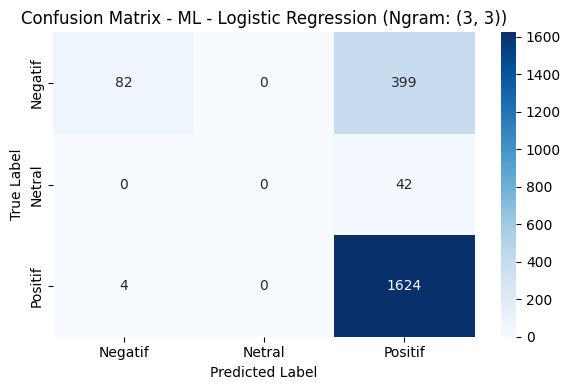


--- Melatih dan Mengevaluasi: ML - MLP Neural Network (Ngram: (3, 3)) ---
Pelatihan selesai dalam 7.84 detik.

--- Evaluasi untuk Metode: ML - MLP Neural Network (Ngram: (3, 3)) ---
Akurasi: 0.8656
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.90      0.54      0.67       481
      Netral       1.00      0.02      0.05        42
     Positif       0.86      0.98      0.92      1628

    accuracy                           0.87      2151
   macro avg       0.92      0.51      0.55      2151
weighted avg       0.87      0.87      0.85      2151



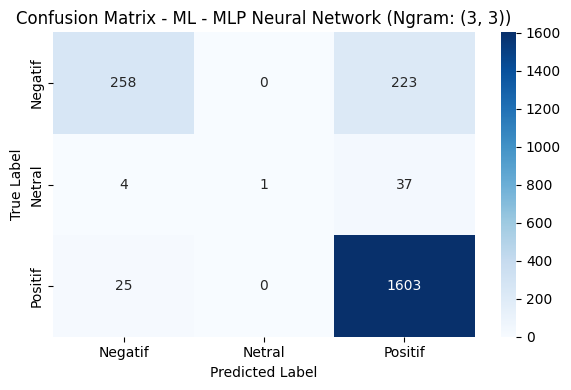


--- Melatih dan Mengevaluasi: ML - Naive Bayes (Multinomial) (Ngram: (3, 3)) ---
Pelatihan selesai dalam 0.00 detik.

--- Evaluasi untuk Metode: ML - Naive Bayes (Multinomial) (Ngram: (3, 3)) ---
Akurasi: 0.8089
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.94      0.25      0.39       481
      Netral       0.00      0.00      0.00        42
     Positif       0.80      1.00      0.89      1628

    accuracy                           0.81      2151
   macro avg       0.58      0.41      0.43      2151
weighted avg       0.82      0.81      0.76      2151



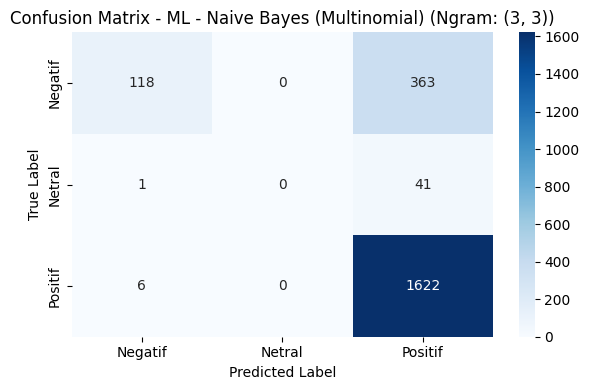



==================== MEMPROSES N-GRAM: (4, 4) UNTUK SEMUA MODEL ML ====================

--- Mempersiapkan data dengan N-gram: (4, 4) (dari 'processed_text') ---
Jumlah data valid: 10752
[INFO] Melakukan fit dan transform TF-IDF...
Dimensi matriks TF-IDF: (10752, 796)
Label mapping: {0: 'Negatif', 1: 'Netral', 2: 'Positif'}
Persiapan data selesai dalam 0.12 detik.

--- Melatih dan Mengevaluasi: ML - Logistic Regression (Ngram: (4, 4)) ---
Pelatihan selesai dalam 0.01 detik.

--- Evaluasi untuk Metode: ML - Logistic Regression (Ngram: (4, 4)) ---
Akurasi: 0.7643
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.94      0.04      0.07       481
      Netral       0.00      0.00      0.00        42
     Positif       0.76      1.00      0.87      1628

    accuracy                           0.76      2151
   macro avg       0.57      0.34      0.31      2151
weighted avg       0.79      0.76      0.67      2151



/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


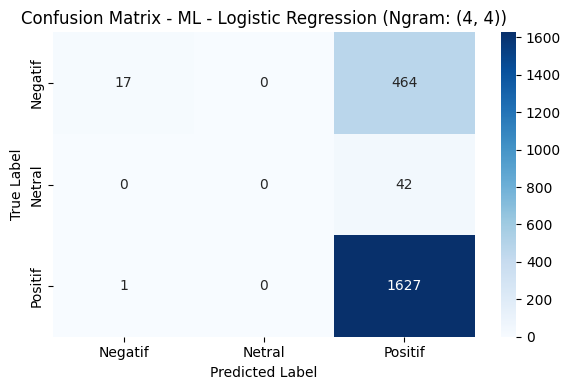


--- Melatih dan Mengevaluasi: ML - MLP Neural Network (Ngram: (4, 4)) ---
Pelatihan selesai dalam 2.09 detik.

--- Evaluasi untuk Metode: ML - MLP Neural Network (Ngram: (4, 4)) ---
Akurasi: 0.7968
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.93      0.19      0.32       481
      Netral       0.00      0.00      0.00        42
     Positif       0.79      1.00      0.88      1628

    accuracy                           0.80      2151
   macro avg       0.57      0.40      0.40      2151
weighted avg       0.81      0.80      0.74      2151



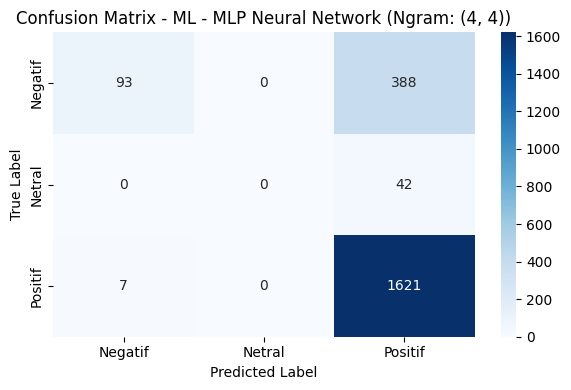


--- Melatih dan Mengevaluasi: ML - Naive Bayes (Multinomial) (Ngram: (4, 4)) ---
Pelatihan selesai dalam 0.00 detik.

--- Evaluasi untuk Metode: ML - Naive Bayes (Multinomial) (Ngram: (4, 4)) ---
Akurasi: 0.7736
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.93      0.08      0.15       481
      Netral       0.00      0.00      0.00        42
     Positif       0.77      1.00      0.87      1628

    accuracy                           0.77      2151
   macro avg       0.57      0.36      0.34      2151
weighted avg       0.79      0.77      0.69      2151



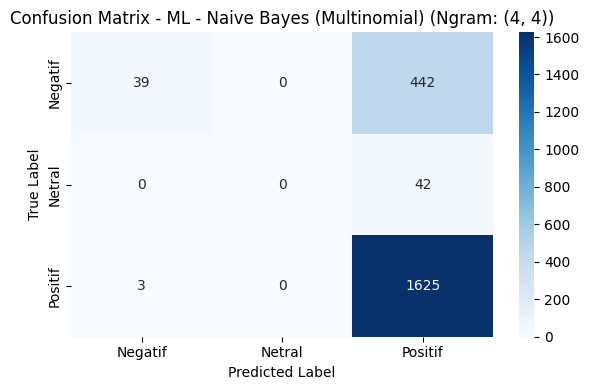


[FASE ML - EKSPERIMEN N-GRAM & EVALUASI ML] Selesai dalam 26.50 detik.
--------------------------------------------------
[INFO] 4 hasil dari metode kamus (dari Blok 4) digabungkan.
[INFO] 12 hasil dari model ML (dengan N-gram spesifik) digabungkan.


--- Tabel Perbandingan Kinerja: Metode Kamus vs. Model ML (dengan N-gram Tunggal Spesifik) ---
Menampilkan DataFrame perbandingan (jika di Jupyter/IPython):


,Method,Accuracy,Negatif_Precision,Negatif_Recall,Negatif_F1-Score,Negatif_Support,Netral_Precision,Netral_Recall,Netral_F1-Score,Netral_Support,Positif_Precision,Positif_Recall,Positif_F1-Score,Positif_Support,Macro_Avg_Precision,Macro_Avg_Recall,Macro_Avg_F1-Score,Weighted_Avg_Precision,Weighted_Avg_Recall,Weighted_Avg_F1-Score
0,AFINN,0.104446,0.887719,0.105154,0.188034,2406.0,0.020262,0.951923,0.039679,208.0,0.966906,0.082576,0.152157,8138.0,0.624963,0.379884,0.126623,0.930874,0.104446,0.158009
1,SentiWordNet,0.124628,0.748428,0.098919,0.174743,2406.0,0.018970,0.841346,0.037104,208.0,0.766749,0.113910,0.198352,8138.0,0.511382,0.351392,0.136733,0.748184,0.124628,0.189950
2,SenticNet,0.185826,0.746073,0.118454,0.204448,2406.0,0.019605,0.774038,0.038242,208.0,0.719184,0.190710,0.301476,8138.0,0.494954,0.361068,0.181389,0.711668,0.185826,0.274672
3,TextBlob,0.141927,0.848485,0.011638,0.022960,2406.0,0.021426,0.966346,0.041923,208.0,0.969357,0.159376,0.273744,8138.0,0.613089,0.379120,0.112876,0.923971,0.141927,0.213141
4,"ML - Logistic Regression (Ngram: (1, 1))",0.947001,0.930283,0.887734,0.908511,481.0,1.000000,0.023810,0.046512,42.0,0.951508,0.988329,0.969569,1628.0,0.960597,0.633291,0.641530,0.947709,0.947001,0.937892
5,"ML - MLP Neural Network (Ngram: (1, 1))",0.951185,0.917184,0.920998,0.919087,481.0,0.800000,0.095238,0.170213,42.0,0.961515,0.982187,0.971741,1628.0,0.892900,0.666141,0.687014,0.948448,0.951185,0.944316
6,"ML - Naive Bayes (Multinomial) (Ngram: (1, 1))",0.952115,0.903614,0.935551,0.919305,481.0,0.000000,0.000000,0.000000,42.0,0.966727,0.981572,0.974093,1628.0,0.623447,0.639041,0.631133,0.933738,0.952115,0.942822
7,"ML - Logistic Regression (Ngram: (2, 2))",0.872152,0.969466,0.528067,0.683715,481.0,0.000000,0.000000,0.000000,42.0,0.858655,0.996314,0.922377,1628.0,0.609374,0.508127,0.535364,0.866668,0.872152,0.850998
8,"ML - MLP Neural Network (Ngram: (2, 2))",0.928405,0.928230,0.806653,0.863181,481.0,0.666667,0.047619,0.088889,42.0,0.928902,0.987101,0.957117,1628.0,0.841266,0.613791,0.636396,0.923631,0.928405,0.919159
9,"ML - Naive Bayes (Multinomial) (Ngram: (2, 2))",0.909809,0.949861,0.708940,0.811905,481.0,0.000000,0.000000,0.000000,42.0,0.901786,0.992629,0.945029,1628.0,0.617215,0.567190,0.585645,0.894928,0.909809,0.896808



[INFO] Tabel perbandingan (Kamus vs ML N-gram spesifik) disimpan ke: Data_Perbandingan_Kamus_vs_ML_Ngram_Spesifik_Final.csv


TOP 5 METODE BERDASARKAN METRIK EVALUASI

--- Top 5 Metode Berdasarkan Accuracy ---


,Method,Accuracy,Weighted_Avg_F1-Score
6,"ML - Naive Bayes (Multinomial) (Ngram: (1, 1))",0.952115,0.942822
5,"ML - MLP Neural Network (Ngram: (1, 1))",0.951185,0.944316
4,"ML - Logistic Regression (Ngram: (1, 1))",0.947001,0.937892
8,"ML - MLP Neural Network (Ngram: (2, 2))",0.928405,0.919159
9,"ML - Naive Bayes (Multinomial) (Ngram: (2, 2))",0.909809,0.896808



--- Top 5 Metode Berdasarkan Weighted_Avg_F1-Score ---


,Method,Weighted_Avg_F1-Score,Accuracy
5,"ML - MLP Neural Network (Ngram: (1, 1))",0.944316,0.951185
6,"ML - Naive Bayes (Multinomial) (Ngram: (1, 1))",0.942822,0.952115
4,"ML - Logistic Regression (Ngram: (1, 1))",0.937892,0.947001
8,"ML - MLP Neural Network (Ngram: (2, 2))",0.919159,0.928405
9,"ML - Naive Bayes (Multinomial) (Ngram: (2, 2))",0.896808,0.909809


--------------------------------------------------
--- Proses Selesai (Blok 7 - Eksperimen ML dengan N-gram Spesifik & Perbandingan Akhir) ---


In [57]:
# --- Blok 7: Pelatihan Model ML (dengan N-gram Tunggal Spesifik) dan Perbandingan Akhir dengan Kamus ---
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd # Pastikan pandas diimpor

# List BARU untuk menyimpan hasil evaluasi model ML dari EKSEKUSI BLOK INI SAJA
evaluation_results_ml_specific_ngrams = [] 

print("[FASE ML - EKSPERIMEN N-GRAM SPESIFIK & EVALUASI ML vs GROUND TRUTH]")
start_fase_ml_eval_time = time.time()

# Pastikan prasyarat ada
if 'df' not in globals() or 'prepare_ml_data_for_specific_ngrams' not in globals() or \
   'evaluate_sentiments_detailed' not in globals() or 'TARGET_COLUMN_FOR_ML' not in globals():
    print("[FATAL ERROR] Variabel/fungsi prasyarat tidak ditemukan.")
    print("         Pastikan Blok 0, 1, 4 (untuk evaluate_sentiments_detailed), dan 6 sudah dijalankan.")
    raise NameError("Prerequisites not met. Run previous blocks.")

# Konfigurasi N-gram yang akan diuji untuk ML
ngram_configurations_ml = [
    (1, 1),  # Hanya Unigrams
    (2, 2),  # Hanya Bigrams
    (3, 3),  # Hanya Trigrams
    (4, 4)   # Hanya Fourgrams
]
print(f"[INFO] Akan menguji model ML dengan konfigurasi N-gram tunggal: {ngram_configurations_ml}")

models_to_train = {
    "Logistic Regression": LogisticRegression(solver='liblinear', multi_class='auto', random_state=42, max_iter=1000),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(64,), max_iter=200, activation='relu', solver='adam', random_state=42, early_stopping=True, n_iter_no_change=10, learning_rate_init=0.001),
    "Naive Bayes (Multinomial)": MultinomialNB()
}

# Loop melalui setiap konfigurasi N-gram spesifik
for ngram_config in ngram_configurations_ml:
    print(f"\n\n{'='*20} MEMPROSES N-GRAM: {ngram_config} UNTUK SEMUA MODEL ML {'='*20}")
    
    # 1. Persiapkan data dengan konfigurasi N-gram saat ini
    ml_data_package = prepare_ml_data_for_specific_ngrams(df, ngram_config) # Menggunakan 'df' dari Blok 0/1
    if ml_data_package[0] is None: # Cek jika ada error saat persiapan data
        print(f"[ERROR] Gagal mempersiapkan data untuk ngram {ngram_config}. Melanjutkan ke N-gram berikutnya.")
        continue

    X_train, X_test, y_train, y_test, \
    current_label_encoder, current_class_names, _, _ = ml_data_package # test_original_indices tidak dipakai di sini

    # 2. Loop melalui setiap model ML untuk dilatih dan dievaluasi terhadap TARGET_COLUMN_FOR_ML
    for model_name, model_prototype in models_to_train.items():
        method_identifier = f"ML - {model_name} (Ngram: {ngram_config})"
        print(f"\n--- Melatih dan Mengevaluasi: {method_identifier} ---")
        
        current_model_instance = model_prototype 
        start_train_loop = time.time()
        try:
            current_model_instance.fit(X_train, y_train)
        except Exception as e:
            print(f"[ERROR] Gagal melatih {method_identifier}: {e}")
            continue 
        print(f"Pelatihan selesai dalam {time.time() - start_train_loop:.2f} detik.")

        y_pred_ml_encoded = current_model_instance.predict(X_test)
        y_pred_ml_labels = current_label_encoder.inverse_transform(y_pred_ml_encoded)
        y_test_ground_truth_labels = current_label_encoder.inverse_transform(y_test) # Ground truth

        metrics_for_ml = evaluate_sentiments_detailed(
            pd.Series(y_test_ground_truth_labels), # Evaluasi terhadap Sentimen Akhir (ground truth)
            pd.Series(y_pred_ml_labels),
            method_identifier,
            labels_order=current_class_names
        )
        if metrics_for_ml:
            evaluation_results_ml_specific_ngrams.append(metrics_for_ml)

end_fase_ml_eval_time = time.time()
print(f"\n[FASE ML - EKSPERIMEN N-GRAM & EVALUASI ML] Selesai dalam {end_fase_ml_eval_time - start_fase_ml_eval_time:.2f} detik.")
print("-" * 50)

# --- Menggabungkan Hasil Kamus (dari Blok 4) dengan Hasil ML (dari eksekusi Blok 7 ini) ---
final_comparison_results_list = []

# Asumsikan hasil evaluasi kamus disimpan di 'evaluation_results' dari Blok 4
# Jika Anda menamakannya berbeda di Blok 4, sesuaikan di sini.
if 'evaluation_results' in globals() and isinstance(evaluation_results, list):
    final_comparison_results_list.extend(evaluation_results)
    print(f"[INFO] {len(evaluation_results)} hasil dari metode kamus (dari Blok 4) digabungkan.")
else:
    print("[PERINGATAN] 'evaluation_results' (dari Blok 4 untuk kamus) tidak ditemukan atau bukan list. Hasil kamus mungkin tidak ada di tabel akhir.")

final_comparison_results_list.extend(evaluation_results_ml_specific_ngrams)
print(f"[INFO] {len(evaluation_results_ml_specific_ngrams)} hasil dari model ML (dengan N-gram spesifik) digabungkan.")

# --- Tabel Perbandingan Akhir (Kamus vs ML dengan N-gram Spesifik) ---
if final_comparison_results_list:
    df_comparison_final_table = pd.DataFrame(final_comparison_results_list)
    df_comparison_final_table.drop_duplicates(subset=['Method'], keep='last', inplace=True) # Hapus duplikat jika Blok 4/7 dijalankan ulang
    
    # Atur urutan kolom
    ordered_cols_final_table = ['Method', 'Accuracy']
    # Dapatkan semua label unik dari target_column_for_ml di 'df' asli (setelah NaN drop)
    if TARGET_COLUMN_FOR_ML in df.columns:
         all_possible_labels_for_table = sorted(list(set(df[TARGET_COLUMN_FOR_ML].dropna().unique())))
    else:
         all_possible_labels_for_table = ["Positif", "Netral", "Negatif"]
         print(f"[PERINGATAN] Kolom target atau df tidak ditemukan untuk urutan label tabel, menggunakan default.")
    
    for label in all_possible_labels_for_table:
        if f'{label}_Precision' in df_comparison_final_table.columns:
            ordered_cols_final_table.extend([f'{label}_Precision', f'{label}_Recall', f'{label}_F1-Score', f'{label}_Support'])
    
    avg_cols_to_check_final_table = ['Macro_Avg_Precision', 'Macro_Avg_Recall', 'Macro_Avg_F1-Score', 
                                     'Weighted_Avg_Precision', 'Weighted_Avg_Recall', 'Weighted_Avg_F1-Score']
    for col in avg_cols_to_check_final_table:
        if col in df_comparison_final_table.columns:
            ordered_cols_final_table.append(col)
    
    final_ordered_cols_for_print = [col for col in ordered_cols_final_table if col in df_comparison_final_table.columns]
    if final_ordered_cols_for_print:
        df_comparison_final_table = df_comparison_final_table.reindex(columns=final_ordered_cols_for_print)
    elif 'Method' in df_comparison_final_table.columns and 'Accuracy' in df_comparison_final_table.columns : # Fallback
        df_comparison_final_table = df_comparison_final_table[['Method', 'Accuracy']]

    print("\n\n--- Tabel Perbandingan Kinerja: Metode Kamus vs. Model ML (dengan N-gram Tunggal Spesifik) ---")
    try:
        from IPython.display import display
        print("Menampilkan DataFrame perbandingan (jika di Jupyter/IPython):")
        display(df_comparison_final_table)
    except ImportError:
        print(df_comparison_final_table.to_string(na_rep='-'))
    
    try:
        comparison_final_csv_path = 'Data_Perbandingan_Kamus_vs_ML_Ngram_Spesifik_Final.csv'
        df_comparison_final_table.to_csv(comparison_final_csv_path, index=False, encoding='utf-8-sig')
        print(f"\n[INFO] Tabel perbandingan (Kamus vs ML N-gram spesifik) disimpan ke: {comparison_final_csv_path}")
    except Exception as e:
        print(f"[ERROR] Gagal menyimpan tabel perbandingan: {e}")
else:
    print("[PERINGATAN] Tidak ada hasil evaluasi gabungan untuk membuat tabel perbandingan.")

# Menampilkan 5 Metode Teratas
if 'df_comparison_final_table' in globals() and not df_comparison_final_table.empty:
    # ... (Kode untuk menampilkan Top 5 metode seperti pada versi Blok 7 Anda sebelumnya, menggunakan df_comparison_final_table) ...
    print("\n\n" + "="*30)
    print("TOP 5 METODE BERDASARKAN METRIK EVALUASI")
    print("="*30)
    sort_metric_accuracy = 'Accuracy'
    sort_metric_f1_weighted = 'Weighted_Avg_F1-Score'

    if sort_metric_accuracy in df_comparison_final_table.columns:
        df_top5_accuracy = df_comparison_final_table.sort_values(by=sort_metric_accuracy, ascending=False).head(5)
        print(f"\n--- Top 5 Metode Berdasarkan {sort_metric_accuracy} ---")
        cols_to_show_acc = ['Method', sort_metric_accuracy]
        if sort_metric_f1_weighted in df_top5_accuracy.columns: cols_to_show_acc.append(sort_metric_f1_weighted)
        try: display(df_top5_accuracy[cols_to_show_acc])
        except: print(df_top5_accuracy[cols_to_show_acc].to_string(index=False))
            
    if sort_metric_f1_weighted in df_comparison_final_table.columns:
        df_top5_f1_weighted = df_comparison_final_table.sort_values(by=sort_metric_f1_weighted, ascending=False).head(5)
        print(f"\n--- Top 5 Metode Berdasarkan {sort_metric_f1_weighted} ---")
        cols_to_show_f1 = ['Method', sort_metric_f1_weighted]
        if sort_metric_accuracy in df_top5_f1_weighted.columns and sort_metric_accuracy not in cols_to_show_f1:
            cols_to_show_f1.append(sort_metric_accuracy)
        try: display(df_top5_f1_weighted[cols_to_show_f1])
        except: print(df_top5_f1_weighted[cols_to_show_f1].to_string(index=False))
else:
    print("[PERINGATAN] Tidak dapat menampilkan Top 5 metode karena tabel perbandingan kosong atau tidak ada.")


print("-" * 50)
print("--- Proses Selesai (Blok 7 - Eksperimen ML dengan N-gram Spesifik & Perbandingan Akhir) ---")